FileNotFoundError: No such file or no access: '/home/mariopasc/Python/Datasets/ds-epilepsy/T2FLAIR/sub-00001_study_brightness_0.nii.gz'

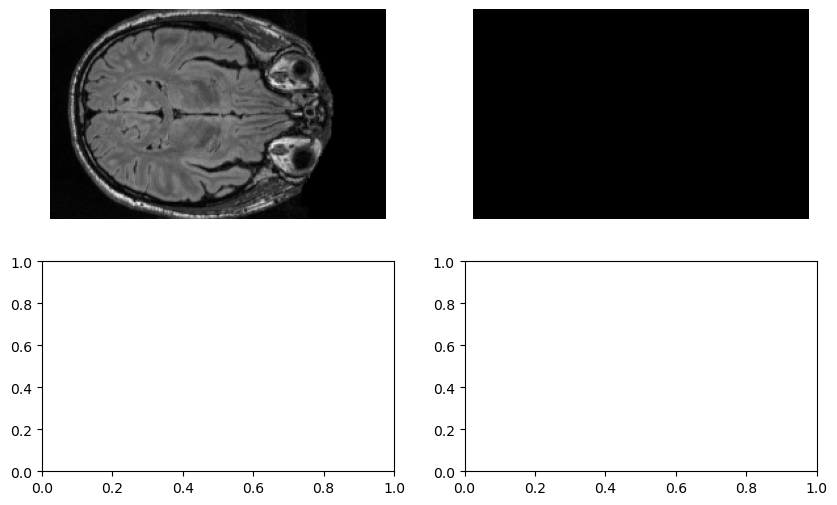

In [25]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
path_im = "/home/mariopasc/Python/Datasets/ds-epilepsy/T2FLAIR"
path_roi = "/home/mariopasc/Python/Datasets/ds-epilepsy/ROI_T2"

aug_file_im = "sub-00001_study_brightness_0.nii.gz"
aug_file_roi = "sub-00001_roi_brightness_0.nii.gz"
aug_path_im, aug_path_roi = os.path.join(path_im, aug_file_im), os.path.join(path_roi, aug_file_roi)

file_im = "sub-00055_acq-tse3dvfl_FLAIR.nii.gz"
file_roi = "sub-00055_acq-tse3dvfl_FLAIR_roi.nii.gz"
path_im, path_roi = os.path.join(path_im, file_im), os.path.join(path_roi, file_roi)



fig, axes = plt.subplots(2, 2, figsize=(10,6))
axes[0, 0].imshow(np.uint8(nib.load(path_im).get_fdata()[:, :, 155]), cmap="gray")
axes[0, 0].axis("off")
axes[0, 1].imshow(np.uint8(nib.load(path_roi).get_fdata()[:, :, 155]), cmap="gray")
axes[0, 1].axis("off")

axes[1, 0].imshow(np.uint8(nib.load(aug_path_im).get_fdata()[:, :, 10]), cmap="gray")
axes[1, 0].axis("off")
axes[1, 1].imshow(np.uint8(nib.load(aug_path_roi).get_fdata()[:, :, 10]), cmap="gray")
axes[1, 1].axis("off")
plt.show()

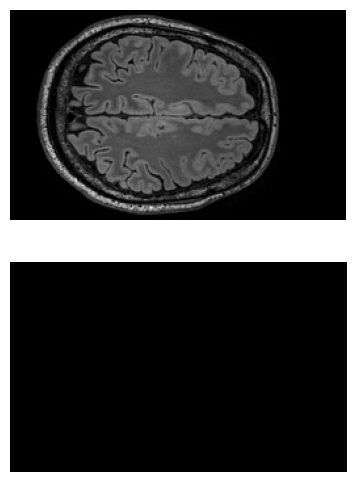

In [38]:
path_im = "/home/mariopasc/Python/Datasets/ds-epilepsy/T2FLAIR"
path_roi = "/home/mariopasc/Python/Datasets/ds-epilepsy/ROI_T2"


file_im = "sub-00063_acq-T2sel_FLAIR.nii.gz"
file_roi = "sub-00063_acq-T2sel_FLAIR_roi.nii.gz"
path_im, path_roi = os.path.join(path_im, file_im), os.path.join(path_roi, file_roi)



fig, axes = plt.subplots(2,figsize=(10,6))
axes[0].imshow(np.uint8(nib.load(path_im).get_fdata()[:, :, 159]), cmap="gray")
axes[0].axis("off")
axes[1].imshow(np.uint8(nib.load(path_roi).get_fdata()[:, :, 159]), cmap="gray")
axes[1].axis("off")


plt.show()

In [7]:
import os
import numpy as np
dataset_path = "/home/mariopasc/Python/Datasets/T2FLAIR-ds-epilepsy"

valid_roi_per_patient = {'sub-00004': [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155], 
                         'sub-00071': [151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170], 
                         'sub-00033': [171, 172, 173, 174, 175, 176, 177, 178], 
                         'sub-00091': [155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166], 
                         'sub-00066': [148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171], 
                         'sub-00103': [145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163], 
                         'sub-00043': [129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148], 
                         'sub-00109': [160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178], 
                         'sub-00126': [181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207], 
                         'sub-00099': [107, 108, 109, 110, 111, 112, 113, 114, 115], 
                         'sub-00145': [143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154], 
                         'sub-00090': [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165], 
                         'sub-00107': [178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 196, 197], 
                         'sub-00132': [180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 193, 194, 195, 196, 197, 198, 199, 200, 201, 205], 
                         'sub-00058': [177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215], 
                         'sub-00034': [171, 172, 173, 174, 175, 176, 177, 178, 179], 
                         'sub-00131': [159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 176, 177, 178, 179, 180, 181, 182, 183], 
                         'sub-00136': [160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 176, 177, 178], 
                         'sub-00061': [151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176], 
                         'sub-00003': [149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 180, 181, 182], 
                         'sub-00072': [164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175], 
                         'sub-00020': [162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191], 
                         'sub-00081': [150, 151, 152, 153, 154, 155, 156, 157, 158, 159], 
                         'sub-00010': [130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165], 
                         'sub-00128': [156, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190], 
                         'sub-00050': [152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171], 
                         'sub-00060': [130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157], 
                         'sub-00048': [148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160], 
                         'sub-00105': [164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175], 
                         'sub-00116': [116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136], 
                         'sub-00059': [148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172], 
                         'sub-00024': [144, 145, 146, 147, 148, 149, 150, 151, 152, 153], 
                         'sub-00144': [148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 162, 163], 
                         'sub-00076': [158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171], 
                         'sub-00134': [175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 188, 189, 190, 191, 192, 193, 194, 195], 
                         'sub-00009': [126, 128, 129, 130, 131, 132, 133, 134, 135], 
                         'sub-00097': [154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 169, 170, 171, 172], 
                         'sub-00063': [110, 111, 112, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158], 
                         'sub-00055': [162, 163, 164, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200], 
                         'sub-00064': [120, 122, 123, 124, 127, 128, 132, 133, 134, 135, 136, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 164, 167, 168, 170], 
                         'sub-00080': [169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 181, 182, 183, 184], 
                         'sub-00115': [177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197], 
                         'sub-00016': [148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195], 
                         'sub-00087': [158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171], 
                         'sub-00077': [198, 199, 200, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220], 
                         'sub-00038': [174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195], 
                         'sub-00073': [157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169], 
                         'sub-00122': [148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171], 
                         'sub-00141': [166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187], 
                         'sub-00121': [124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147], 
                         'sub-00065': [135, 136, 137, 138, 139, 140, 141, 142, 143, 144], 
                         'sub-00040': [115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155], 
                         'sub-00083': [154, 155, 156, 157, 158, 159, 160, 161, 162, 163], 
                         'sub-00098': [126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147], 
                         'sub-00089': [133, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148], 
                         'sub-00092': [143, 144, 146, 149, 150, 152, 153, 154, 155, 156, 157, 158, 160, 161], 
                         'sub-00014': [112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126], 
                         'sub-00001': [130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144], 
                         'sub-00108': [114, 115, 116, 117, 118, 119, 120, 122], 
                         'sub-00044': [151, 152, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164], 
                         'sub-00032': [158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181], 
                         'sub-00095': [147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165], 
                         'sub-00140': [184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 196, 199, 200, 201, 202], 
                         'sub-00015': [127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143], 
                         'sub-00047': [180, 181, 182, 183, 184, 185, 186, 187, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 205, 206, 207, 208], 
                         'sub-00006': [162, 163, 164, 165, 166], 
                         'sub-00142': [164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187], 
                         'sub-00078': [189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205], 
                         'sub-00062': [155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169], 
                         'sub-00133': [115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140], 
                         'sub-00123': [152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179], 
                         'sub-00101': [150, 151, 152, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167], 
                         'sub-00125': [185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210], 
                         'sub-00139': [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 
                         'sub-00100': [156, 157, 158, 159, 160, 161, 162, 164, 165, 167, 168, 169, 170], 
                         'sub-00138': [145, 146, 147, 148, 149, 150, 164, 165, 166, 167, 170, 172, 173, 174, 175, 176, 177, 179, 180, 183, 184, 185, 186], 
                         'sub-00146': [150, 151, 152, 154, 155, 156, 157, 159, 160, 161, 162]
                         }

import os

def check_missing_labels(dataset_path, set_type):
    # Definir las rutas para las imágenes y las etiquetas
    images_path = os.path.join(dataset_path, "images", set_type)
    labels_path = os.path.join(dataset_path, "labels", set_type)

    # Listar todos los nombres de archivo en los directorios de imágenes y etiquetas
    total_images = os.listdir(images_path)
    total_labels = os.listdir(labels_path)

    # Crear conjuntos de los nombres de archivos sin extensiones para comparar
    image_set = {os.path.splitext(image)[0] for image in total_images}
    label_set = {os.path.splitext(label)[0] for label in total_labels}
    print(image_set)
    # Crear una lista de imágenes que no tienen etiqueta correspondiente
    images_without_label = [image for image in image_set if image not in label_set]
    return images_without_label
    
missing_labels = check_missing_labels(dataset_path, "train")
print(missing_labels)
print(valid_roi_per_patient.get("sub-00024"))

FileNotFoundError: [Errno 2] No such file or directory: '/home/mariopasc/Python/Datasets/T2FLAIR-ds-epilepsy/images/train'

In [43]:
import os
dataset_path = "/home/mariopasc/Python/Datasets/T2FLAIR-ds-epilepsy"
image_folder = os.path.join(dataset_path, "images", "train")
label_folder = os.path.join(dataset_path, "labels", "train")


# Find missing or misaligned label files
exclude = list(range(0, 121)) + list(range(200, 257))
for img_file in os.listdir(image_folder):
    label_file = img_file.replace('.png', '.txt')
    # Non-augmented format: sub-00XXX_slice-XXX.png
    # Augmented format: sub-00XXX_slice-XXX_brightness_XXX.png
    # Diagnose Non-augmented format:
    try: slice = np.uint8(img_file.strip(".png").split("-")[-1]) 
    except Exception as e: continue
    if not os.path.exists(os.path.join(label_folder, label_file)) and slice in exclude:
        print(f"Missing or misaligned label for {img_file}")

In [27]:
import os

train_set = ['sub-00033_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00138_acq-T2sel_FLAIR.nii.gz', 'sub-00050_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00066_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00073_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00072_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00015_acq-T2sel_FLAIR.nii.gz', 'sub-00016_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00024_acq-T2sel_FLAIR.nii.gz', 'sub-00116_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00126_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00125_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00001_acq-T2sel_FLAIR.nii.gz', 'sub-00081_acq-T2sel_FLAIR.nii.gz', 'sub-00044_acq-T2sel_FLAIR.nii.gz', 'sub-00020_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00040_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00077_acq-T2sel_FLAIR.nii.gz', 'sub-00145_acq-T2sel_FLAIR.nii.gz', 'sub-00134_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00146_acq-T2sel_FLAIR.nii.gz', 'sub-00132_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00121_acq-T2sel_FLAIR.nii.gz', 'sub-00009_acq-T2sel_FLAIR.nii.gz', 'sub-00142_acq-T2sel_FLAIR.nii.gz', 'sub-00003_acq-T2sel_FLAIR.nii.gz', 'sub-00089_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00140_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00101_acq-T2sel_FLAIR.nii.gz', 'sub-00133_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00141_acq-T2sel_FLAIR.nii.gz', 'sub-00004_acq-T2sel_FLAIR.nii.gz', 'sub-00047_acq-T2sel_FLAIR.nii.gz', 'sub-00107_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00043_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00095_acq-T2sel_FLAIR.nii.gz', 'sub-00055_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00144_acq-T2sel_FLAIR.nii.gz', 'sub-00097_acq-T2sel_FLAIR.nii.gz', 'sub-00115_acq-T2sel_FLAIR.nii.gz', 'sub-00065_acq-T2sel_FLAIR.nii.gz', 'sub-00087_acq-T2sel_FLAIR.nii.gz', 'sub-00034_acq-T2sel_FLAIR.nii.gz', 'sub-00103_acq-T2sel_FLAIR.nii.gz', 'sub-00105_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00131_acq-T2sel_FLAIR.nii.gz']
val_set = ['sub-00071_acq-T2sel_FLAIR.nii.gz', 'sub-00091_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00059_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00064_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00060_acq-T2sel_FLAIR.nii.gz', 'sub-00014_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00080_acq-T2sel_FLAIR.nii.gz', 'sub-00038_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00109_acq-T2sel_FLAIR.nii.gz', 'sub-00098_acq-T2sel_FLAIR.nii.gz', 'sub-00099_acq-tse3dvfl_FLAIR.nii.gz', 'sub-00063_acq-T2sel_FLAIR.nii.gz', 'sub-00048_acq-T2sel_FLAIR.nii.gz', 'sub-00128_acq-T2sel_FLAIR.nii.gz', 'sub-00010_acq-T2sel_FLAIR.nii.gz']

getPatient = np.vectorize(lambda x: x.split("_")[0])
train_set = getPatient(train_set)
val_set = getPatient(val_set)
train_val = np.concatenate((train_set, val_set))
intersection = np.intersect1d(train_val, np.array(list(valid_roi_per_patient.keys())))
len(intersection)

61

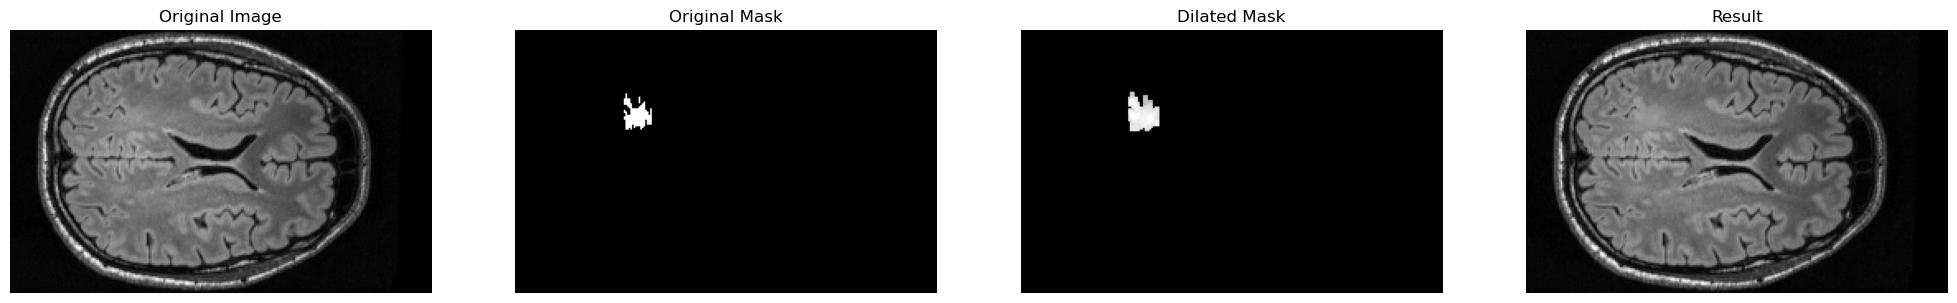

(160, 256, 256)


In [3]:
import cv2
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import os
# Define paths
path_im = "/home/mariopasc/Python/Datasets/ds-epilepsy/T2FLAIR"
path_roi = "/home/mariopasc/Python/Datasets/ds-epilepsy/ROI_T2"

# Load images
file_im = "sub-00055_acq-tse3dvfl_FLAIR.nii.gz"
file_roi = "sub-00055_acq-tse3dvfl_FLAIR_roi.nii.gz"
image_path = os.path.join(path_im, file_im)
mask_path = os.path.join(path_roi, file_roi)

image_nii = nib.load(image_path)
mask_nii = nib.load(mask_path)

image = np.uint8(image_nii.get_fdata())
mask = np.uint8(mask_nii.get_fdata())

# Select a specific slice
slice_index = 165
image_slice = image[:, :, slice_index]
mask_slice = mask[:, :, slice_index]

# Extract the corresponding lesion from the original image
lesion_region = cv2.bitwise_and(image_slice, image_slice, mask=mask_slice)

# Dilate the mask
kernel = np.ones((3,3), np.uint8)
dilated_lesion = cv2.dilate(lesion_region, kernel, iterations=1)

# Create the result image by copying the original slice
result_image = image_slice.copy()

# Apply the dilated region to the result image (Here you can modify if needed)
result_image[dilated_lesion > 0] = dilated_lesion[dilated_lesion > 0]

# Ensure not to exceed the maximum intensity for the image type
result_image = np.clip(result_image, 0, 255)

# Visualization
fig, axes = plt.subplots(1, 4, figsize=(25, 15))

axes[0].imshow(image_slice, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(mask_slice, cmap="gray")
axes[1].set_title("Original Mask")
axes[1].axis('off')

axes[2].imshow(dilated_lesion, cmap="gray")
axes[2].set_title("Dilated Mask")
axes[2].axis('off')

axes[3].imshow(result_image, cmap="gray")
axes[3].set_title("Result")
axes[3].axis('off')

plt.savefig("../images/dilated_comparison.png")
plt.imsave("../images/dilated.png", result_image, cmap="gray")
plt.show()

print(np.shape(image))

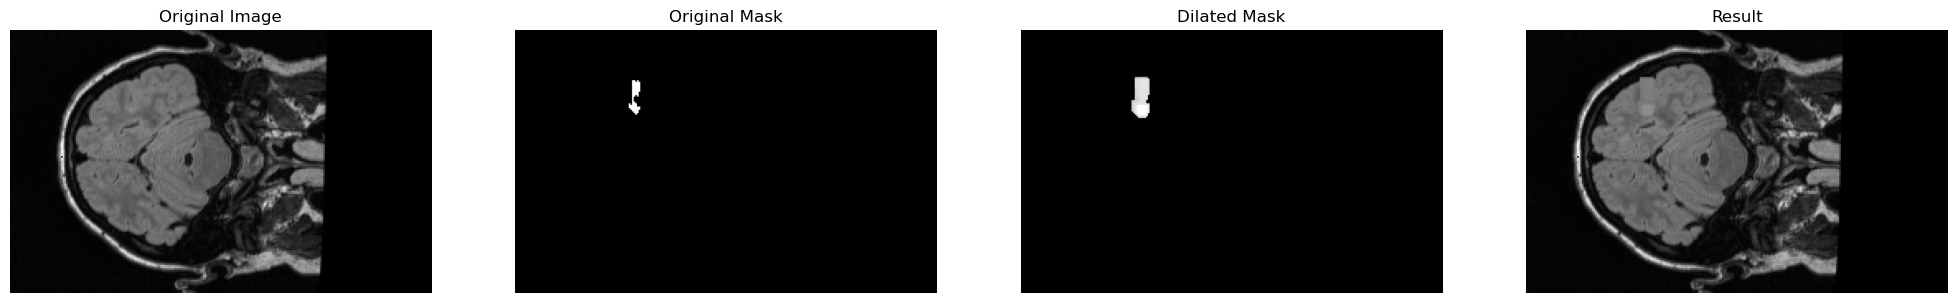

'sub-00139_acq-tse3dvfl_FLAIR_roi.nii.gz'

In [15]:
# Define paths
path_im = "/home/mariopasc/Python/Datasets/ds-epilepsy/T2FLAIR"
path_roi = "/home/mariopasc/Python/Datasets/ds-epilepsy/ROI_T2"
path_bigger_images = "/home/mariopasc/Python/Datasets/ds-epilepsy/BiggerFCD_T2FLAIR"
path_bigger_roi = "/home/mariopasc/Python/Datasets/ds-epilepsy/BiggerFCD_ROIT2FLAIR"

# Load images
file_im = "sub-00139_acq-tse3dvfl_FLAIR.nii.gz"
file_roi = "sub-00139_acq-tse3dvfl_FLAIR_roi.nii.gz"
image_path = os.path.join(path_im, file_im)
mask_path = os.path.join(path_roi, file_roi)
image_bigger_path = os.path.join(path_bigger_images, file_im)
mask_bigger_path = os.path.join(path_bigger_roi, file_roi)


image_nii = nib.load(image_path)
mask_nii = nib.load(mask_path)
image_bigger_nii = nib.load(image_bigger_path)
mask_bigger_nii = nib.load(mask_bigger_path)

image = np.uint8(image_nii.get_fdata())
mask = np.uint8(mask_nii.get_fdata())
image_bigger = np.uint8(image_bigger_nii.get_fdata())
mask_bigger = np.uint8(mask_bigger_nii.get_fdata())
# Select a specific slice
slice_index = 108
image_slice = image[:, :, slice_index]
mask_slice = mask[:, :, slice_index]
image_bigger_slice = image_bigger[:, :, slice_index]
mask_bigger_slice = mask_bigger[:, :, slice_index]

fig, axes = plt.subplots(1, 4, figsize=(25, 15))

axes[0].imshow(image_slice, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(mask_slice, cmap="gray")
axes[1].set_title("Original Mask")
axes[1].axis('off')

axes[2].imshow(mask_bigger_slice, cmap="gray")
axes[2].set_title("Dilated Mask")
axes[2].axis('off')

axes[3].imshow(image_bigger_slice, cmap="gray")
axes[3].set_title("Result")
axes[3].axis('off')

plt.savefig("../images/dilated_comparison.png")
plt.imsave("../images/dilated.png", result_image, cmap="gray")
plt.show()

os.path.basename(mask_path)

In [14]:
import math
valid_slices = []
for i in range(mask.shape[2]):
    slice_data = mask[:, :, i]
    slice_data = np.array(slice_data, dtype=np.uint8)
    contours, _ = cv2.findContours(slice_data, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours and math.ceil(len(contours[0]) / 2) > 3:
        valid_slices.append(i)

print(valid_slices)

[108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [20]:
import numpy as np
import cv2
import os
import nibabel as nib
import matplotlib.pyplot as plt

def overlay_mask_on_image(image, mask, color=(255, 0, 0)):
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    active_pixels = (mask == 255)
    color_image[active_pixels] = color
    return color_image

def overlay_masks_on_image(image, mask_yolo, mask_gt, alpha=0.3):
    # Create a color image
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Create overlays
    overlay_yolo = np.zeros_like(color_image)
    overlay_gt = np.zeros_like(color_image)
    
    # Set the color of the YOLO mask to red
    overlay_yolo[mask_yolo == 255] = [0, 0, 255]
    # Set the color of the ground truth mask to green
    overlay_gt[mask_gt == 1] = [0, 255, 0]
    
    # Combine the overlays
    combined_overlay = cv2.addWeighted(overlay_yolo, alpha, overlay_gt, alpha, 0)
    
    # Add the overlay to the original image
    final_image = cv2.addWeighted(color_image, 1, combined_overlay, 1, 0)
    
    return final_image

def generate_mask_from_yolo(filepath, height, width):
    # Initialize the mask
    mask = np.zeros((height, width), dtype=np.uint8)
    
    # Read YOLO coordinates from the file
    with open(filepath, 'r') as file:
        lines = file.readlines()

    for line in lines:
        yolo_coords = list(map(float, line.split()))
        points = np.array(yolo_coords[1:]).reshape(-1, 2)
        points[:, 0] = points[:, 0] * width
        points[:, 1] = points[:, 1] * height
        points = points.astype(np.int32)

        # Draw the contour on the mask
        cv2.fillPoly(mask, [points], 255)  # Fill the contour to create a mask
    
    return mask

# Define paths
path = "/home/mariopasc/Python/old-dataset/Results-BiggerFCD/xyn_coordinates"
roi_path = "/home/mariopasc/Python/old-dataset/BiggerFCD_T2FLAIR_yolov8_dataset/labels/test"
images = "/home/mariopasc/Python/old-dataset/BiggerFCD_T2FLAIR_yolov8_dataset/images/test"

file = "sub-00083_slice-156.txt"
predicted_label = os.path.join(path, file)
actual_label = os.path.join(roi_path, file)
image = os.path.join(images, file)

# Get the dimensions
height = 640
width = 416
# Load the image and ROI
image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)  # Assuming the path is correct and image is grayscale

# Generate mask and overlay
mask_pred = generate_mask_from_yolo(predicted_label, height, width)
mask_gt = generate_mask_from_yolo(actual_label, height, width)
overlay_image = overlay_mask_on_image(image, mask_gt)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(mask_gt, cmap='gray')
axes[0].set_title('Ground truth mask')
axes[0].axis('off')

axes[1].imshow(mask_pred, cmap='gray')
axes[1].set_title('Mask from YOLO')
axes[1].axis('off')

axes[2].imshow(overlay_masks_on_image(image, mask_pred, mask_gt, alpha=.5))
axes[2].set_title('Image with Mask Overlay')
axes[2].axis('off')

plt.tight_layout()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/home/mariopasc/Python/old-dataset/Results-BiggerFCD/xyn_coordinates/sub-00083_slice-156.txt'

In [32]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import cv2

output_dir = "/home/mariopasc/Python/old-dataset/Results-BiggerFCD"
roi_dir = "/home/mariopasc/Python/Datasets/ds-epilepsy/BiggerFCD_ROIT2FLAIR"

tensor_path = os.path.join(output_dir, "maskTensors")
roi_path = os.path.join(roi_dir, "sub-00083_acq-T2sel_FLAIR_roi.nii.gz")

tensor = torch.load(os.path.join(tensor_path, "sub-00083_slice_156.pt"))
roi = np.uint8(nib.load(roi_path).get_fdata())
roi = roi[:, :, 156]
mask1 = tensor[0]
mask2 = tensor[1]
mask3 = np.clip((mask1 + mask2), 0, 1)

roi = cv2.resize(roi, (mask3.shape[1], mask3.shape[0]), interpolation=cv2.INTER_AREA)

np.zeros(shape=(tensor.shape[1], tensor.shape[2])).shape

(416, 640)

In [53]:
import pandas as pd
path = "/home/mariopasc/Python/old-dataset/Results-BiggerFCD"

stats = pd.read_csv(os.path.join(path, "stats.csv"), index_col=0)
stats.sort_values(by="patient_id")

number_of_roi_images = len(os.listdir("/home/mariopasc/Python/old-dataset/BiggerFCD_T2FLAIR_yolov8_dataset/labels/test"))

missmatch = (number_of_roi_images - stats["exist"].sum()) / number_of_roi_images * 100
mean_dice_score = stats[stats['exist'] == 1]['dice_score'].mean()

print(f"YOLOv8 missed the lesion in {missmatch:.3f}% of all files")
print(f"Mean Dice score for segmented images: {(mean_dice_score * 100):.3f}%")

YOLOv8 missed the lesion in 1.153% of all files
Mean Dice score for segmented images: 82.533%


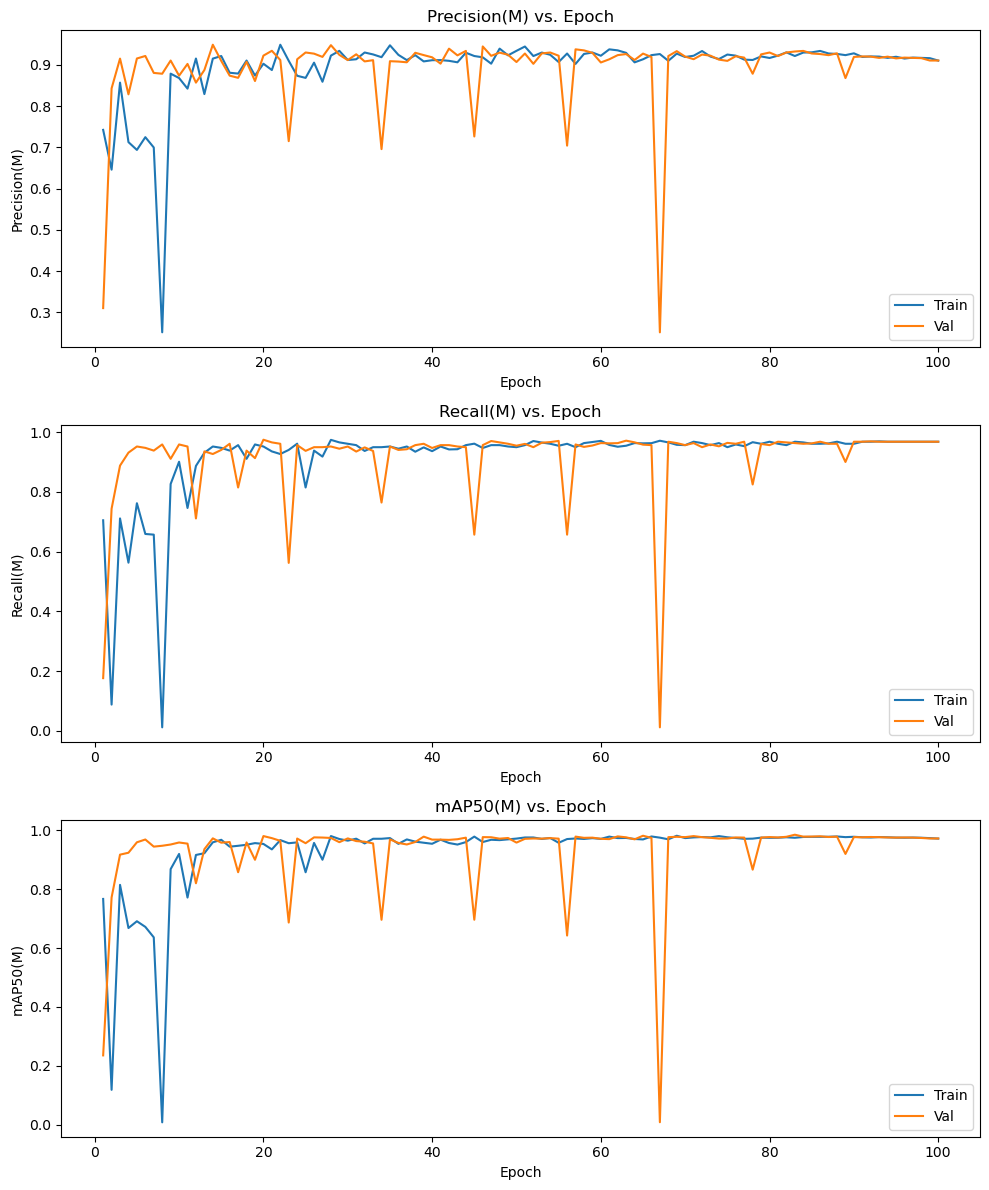

In [32]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
folderx2go = "/home/mariopasc/x2go_shared"
train_df = pd.read_csv(os.path.join(folderx2go, "results.csv"))
train_df.columns = train_df.columns.str.strip()
val_df = pd.read_csv(os.path.join(folderx2go, "results_val.csv"))


import matplotlib.pyplot as plt

# Asumiendo que 'train_df' y 'val_df' son los DataFrames de train y val respectivamente
merged_df = pd.merge(train_df, val_df, on='epoch', suffixes=('_train', '_val'))

# Crear una figura y un conjunto de subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Graficar precision(M)
axs[0].plot(merged_df['epoch'], merged_df['metrics/precision(M)'], label='Train')
axs[0].plot(merged_df['epoch'], merged_df['precision(M)'], label='Val')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Precision(M)')
axs[0].set_title('Precision(M) vs. Epoch')
axs[0].legend()

# Graficar recall(M)
axs[1].plot(merged_df['epoch'], merged_df['metrics/recall(M)'], label='Train')
axs[1].plot(merged_df['epoch'], merged_df['recall(M)'], label='Val')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Recall(M)')
axs[1].set_title('Recall(M) vs. Epoch')
axs[1].legend()

# Graficar mAP50(M)
axs[2].plot(merged_df['epoch'], merged_df['metrics/mAP50(M)'], label='Train')
axs[2].plot(merged_df['epoch'], merged_df['mAP50(M)'], label='Val')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('mAP50(M)')
axs[2].set_title('mAP50(M) vs. Epoch')
axs[2].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()